In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [2]:
def plot_confusion_matrix(data, labels, output_filename):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    
def starttime():
    return time.time()

def endtime():
    return time.time()

In [3]:
dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23-CIC/Dataset/4-PCA-3-ZScore-2-Mean.csv")
dataset["Label"] = dataset["Label"].astype("category").cat.codes
clean_dataset = dataset.drop(columns=["Label"])
label = dataset["Label"]
dataset

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Label
0,-2.229607,3.764813,-0.117099,0.275217,0.257315,-0.023695,-1.839116,0.209895,-0.214998,-0.080722,...,1.664071,0.272442,0.343495,1.969127,1.719321,0.935524,-0.871459,-0.650227,0.005744,0
1,-1.696597,14.356816,-1.255595,4.843810,-1.180270,-0.597340,7.199826,0.100335,0.265596,0.073045,...,1.029260,0.388831,0.146254,0.986608,0.042743,-0.779692,-0.042539,-0.650915,0.327008,0
2,1.818834,-1.482652,-0.253659,2.615985,0.514076,-0.160817,0.296755,-1.427653,0.332657,0.128167,...,-0.412205,-0.098471,-0.178513,-0.162658,0.135642,-0.474916,0.171542,-0.571667,-0.249840,0
3,1.816007,-1.479338,-0.253572,2.612553,0.513126,-0.160740,0.300288,-1.435681,0.311964,0.127128,...,-0.401746,-0.122033,-0.240011,-0.143580,0.102531,-0.464527,0.172742,-0.575020,-0.251360,0
4,1.816672,-1.480547,-0.253548,2.613003,0.513112,-0.160618,0.299000,-1.434777,0.314851,0.127310,...,-0.402273,-0.118781,-0.231780,-0.145385,0.107105,-0.465920,0.172377,-0.574875,-0.251138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553614,-0.534876,-1.429484,-0.003262,1.170015,-0.352479,0.191862,-0.086043,1.083604,-0.637470,-0.087070,...,0.570626,-0.310722,0.314037,-0.393508,0.300406,-0.155016,0.019857,-0.095908,0.026234,1
553615,-0.533816,-1.426977,-0.003618,1.172094,-0.352082,0.191591,-0.082990,1.082900,-0.637896,-0.087172,...,0.568297,-0.311943,0.312462,-0.395764,0.299187,-0.153576,0.020789,-0.095233,0.024222,1
553616,-0.011860,-1.890782,-0.066297,1.752588,-0.283639,0.184916,-0.354259,0.643388,-0.440612,-0.090094,...,0.815373,-0.370767,-0.008225,-0.047128,0.457056,0.098625,-0.160032,0.129669,-0.328612,1
553617,-0.533985,-1.426690,-0.003625,1.172086,-0.351961,0.191492,-0.082089,1.082984,-0.638003,-0.087201,...,0.567725,-0.312003,0.312313,-0.396246,0.298927,-0.153681,0.021058,-0.095129,0.023750,1


In [4]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    clean_dataset, label, test_size=1/7.0, random_state=1
)

In [5]:
start = starttime()
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)
end = starttime()
print(end-start)

95.5384955406189


In [6]:
scores = cross_val_score(estimator=clf, X=clean_dataset, y=label, cv=5, n_jobs=8)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

mean: 0.915 (std: 0.060)



In [7]:
y_pred = clf.predict(x_test)

In [8]:
# Accucary
acc = accuracy_score(y_test, y_pred)
acc

0.9462504267344384

In [9]:
# Recall
recall = recall_score(y_test, y_pred)
recall

0.9457732110813402

In [10]:
# F1 Score
f1 = f1_score(y_test, y_pred)
f1

0.9476484279750249

In [11]:
# Precision
precision = precision_score(y_test, y_pred)
precision

0.9495310957551826

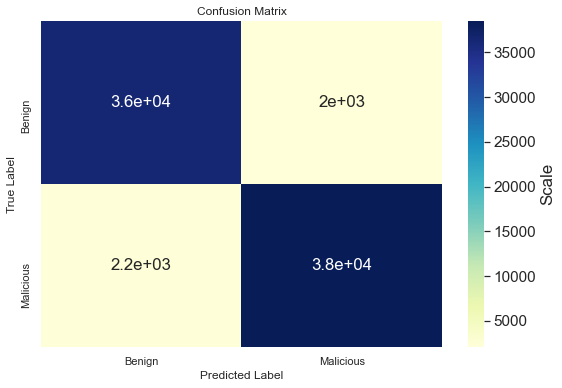

In [12]:
labels = ["Benign", "Malicious"]
conf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf, labels, "confusion_matrix.png")